In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [35]:
#Importing the dataset
df= pd.read_csv("temperature.csv")
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [36]:
df.shape

(7752, 25)

This dataset has 7752 rows and 25 columns.
Let us look at the feature types.

In [37]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

We can see that except the date variable all the other columns are of type float

In [38]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We can see that there are missing values in most of the features and must be handled.

In [39]:
df['Date'] = df['Date'].fillna(df['Date'].mode()[0])

In [40]:
#Extracting day and month from Date
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [41]:
df = df.drop("Date",axis=1)

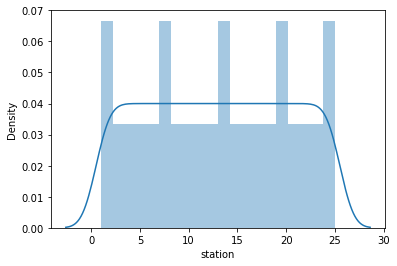

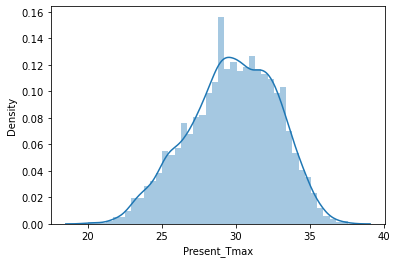

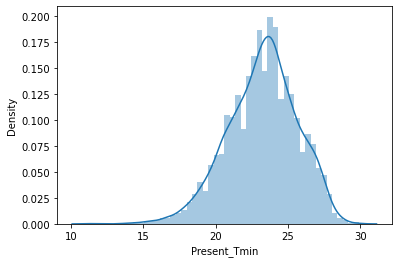

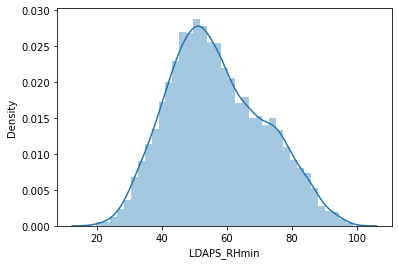

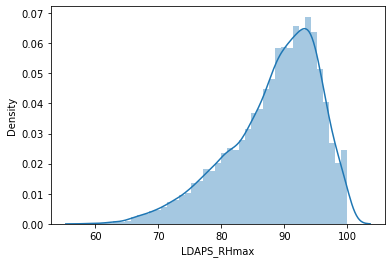

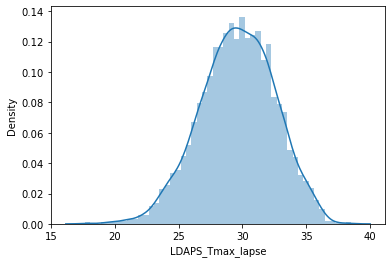

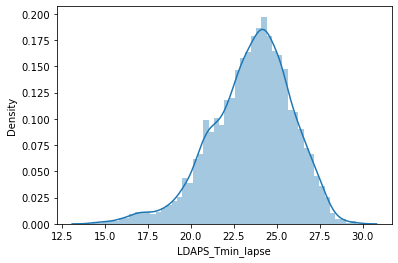

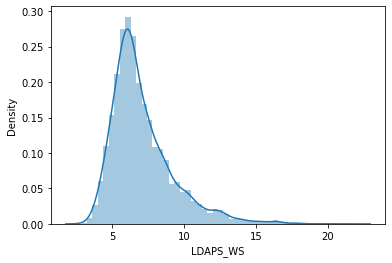

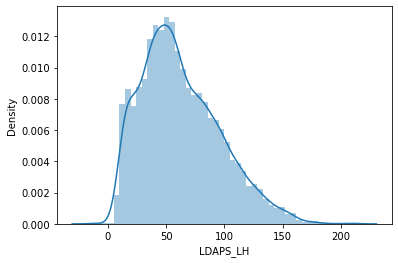

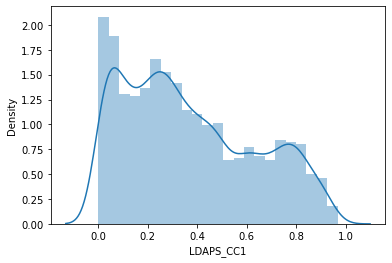

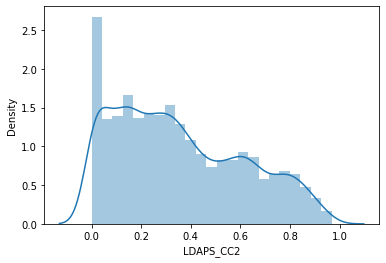

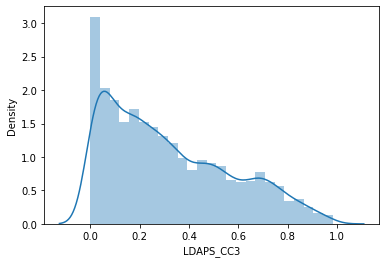

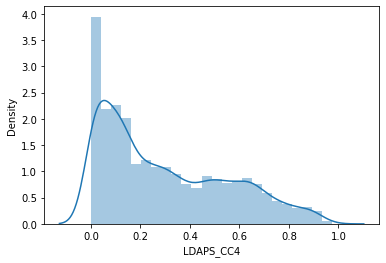

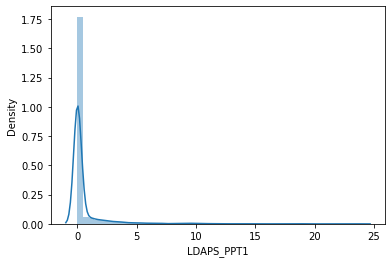

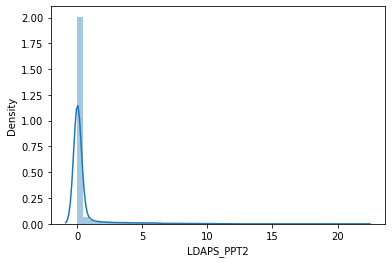

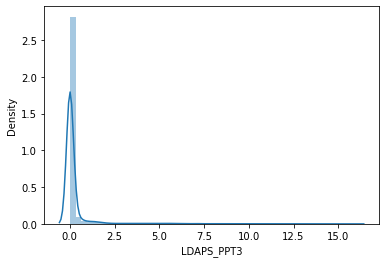

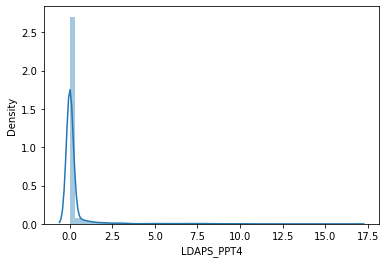

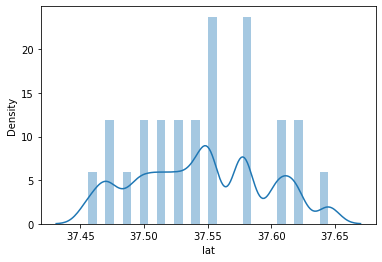

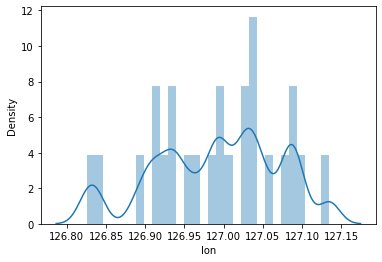

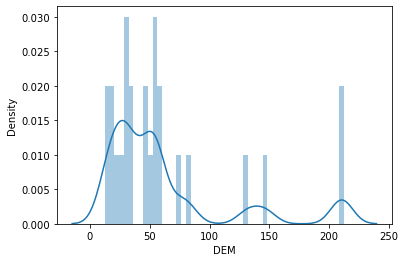

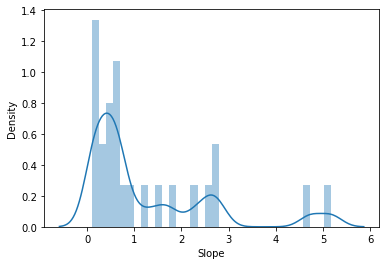

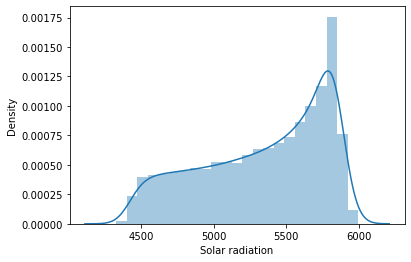

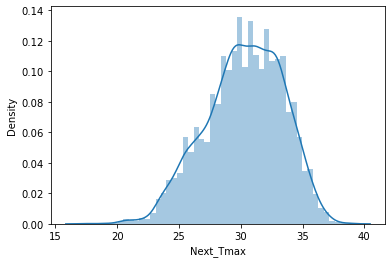

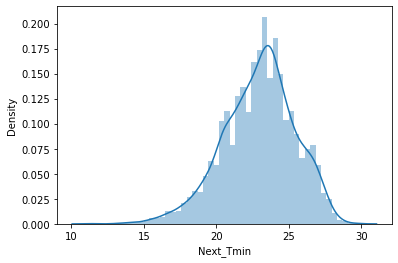

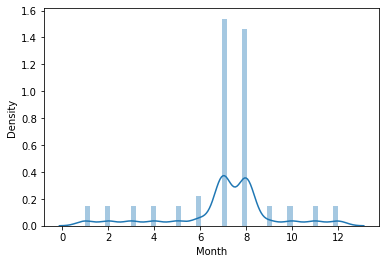

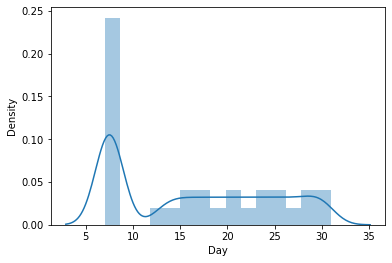

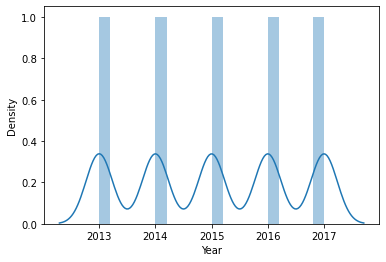

In [42]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    #plt.figure(figsize=(10,10))
    sn.distplot(df[col])

Let us handle the missing values.

In [43]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Month                0
Day                  0
Year                 0
dtype: int64

In [44]:

for i,col in enumerate(df.columns):
    df[col] = df[col].fillna(df[col].mean())


In [45]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Month               0
Day                 0
Year                0
dtype: int64

We have handled the missing values now.

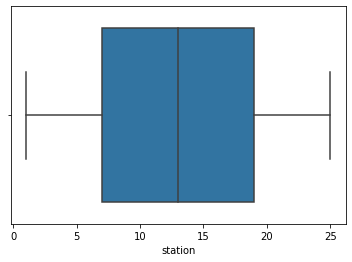

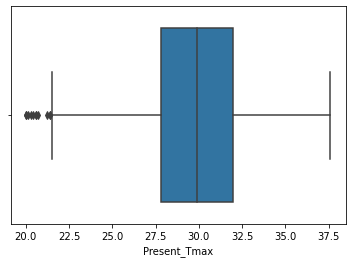

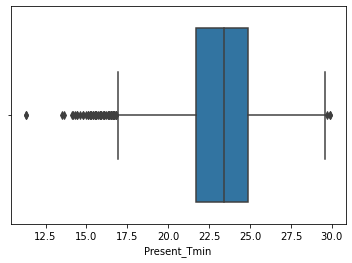

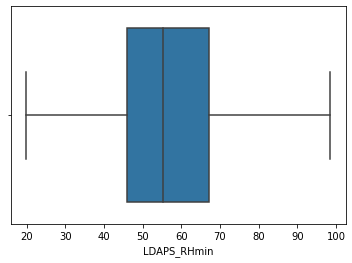

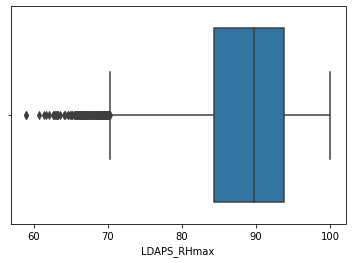

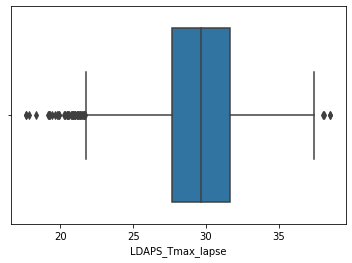

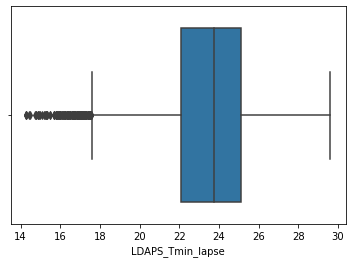

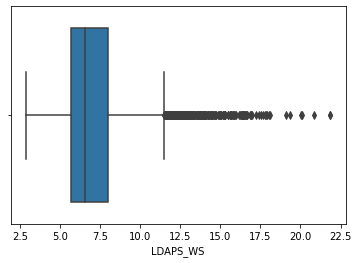

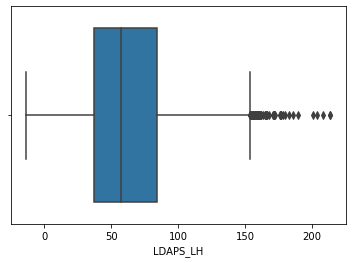

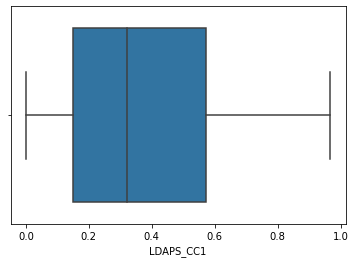

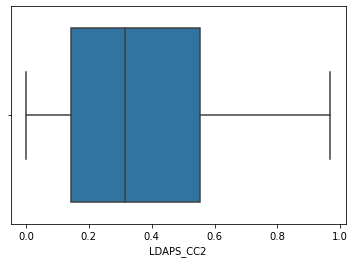

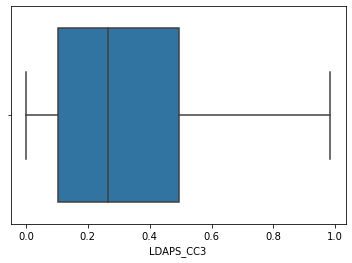

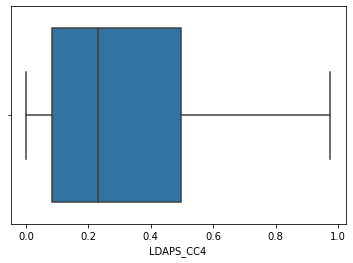

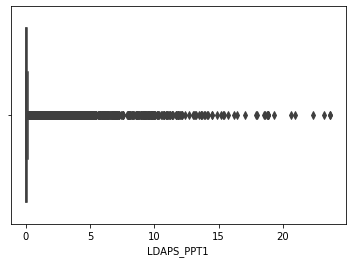

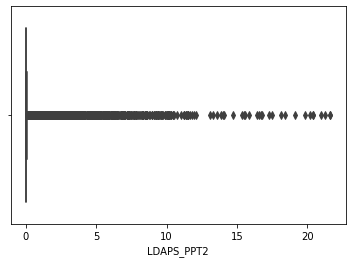

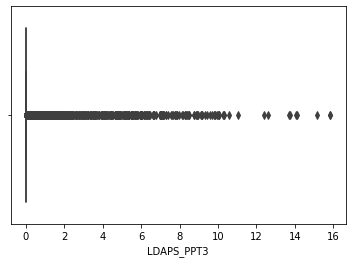

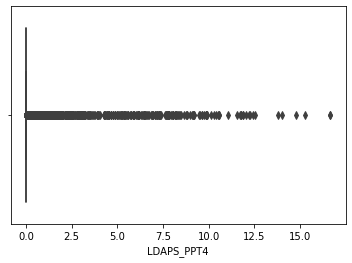

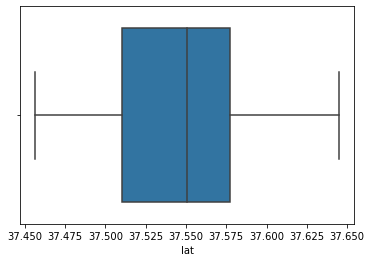

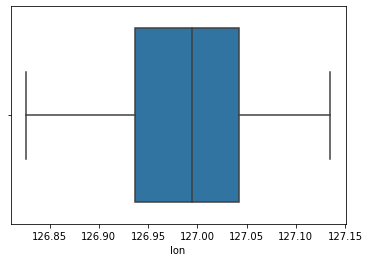

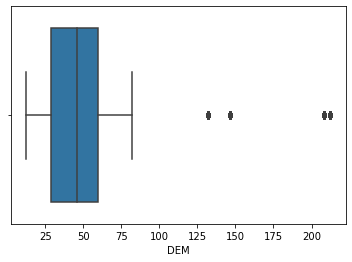

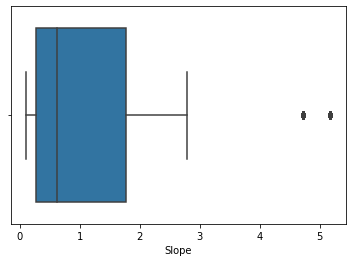

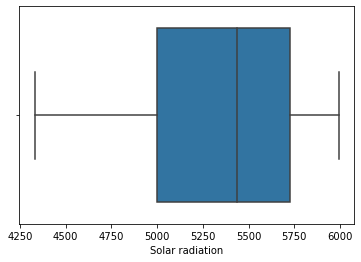

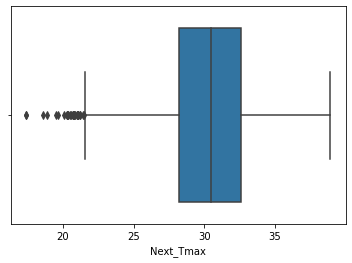

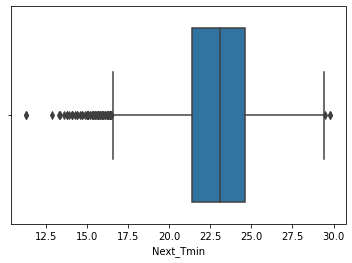

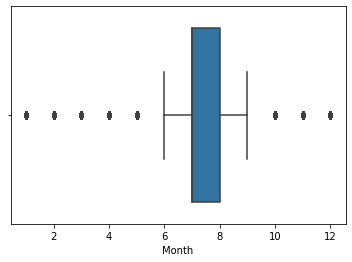

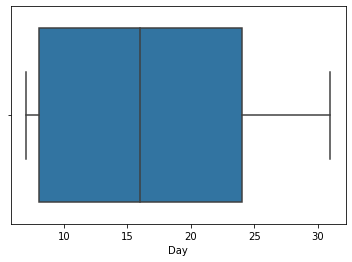

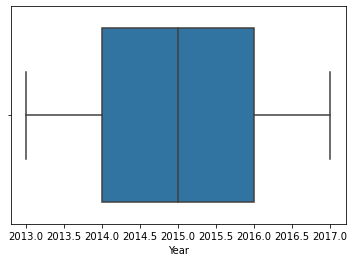

In [46]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    #plt.figure(figsize=(10,10))
    sn.boxplot(df[col])

We can see that there are more outliers present in the dataset.
We will have to remove the outliers.

<AxesSubplot:title={'center':'Comparision between humity and present temperature'}, xlabel='LDAPS_RHmax', ylabel='Present_Tmax'>

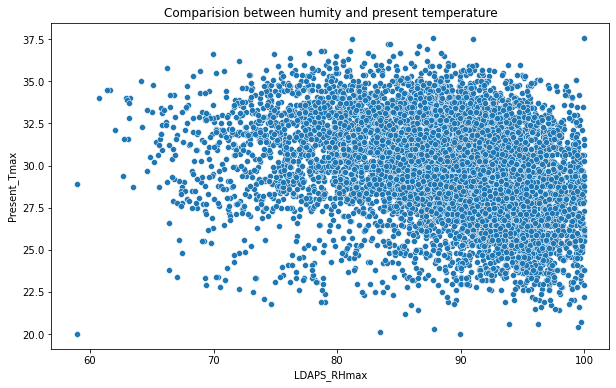

In [47]:
#Bivariate analysis
plt.figure(figsize=[10,6])
plt.title("Comparision between humity and present temperature")
sn.scatterplot(df['LDAPS_RHmax'],df['Present_Tmax'])

<AxesSubplot:title={'center':'Comparision between humity and present temperature'}, xlabel='LDAPS_Tmax_lapse', ylabel='Present_Tmax'>

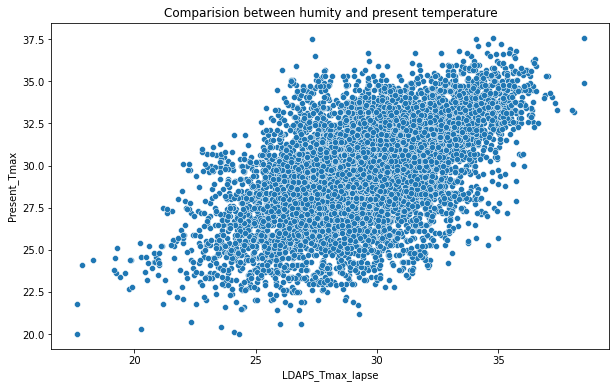

In [48]:
 
plt.figure(figsize=[10,6])
plt.title("Comparision between humity and present temperature")
sn.scatterplot(df['LDAPS_Tmax_lapse'],df['Present_Tmax'])

<AxesSubplot:title={'center':'Comparision between humity and present temperature'}, xlabel='Solar radiation', ylabel='Present_Tmax'>

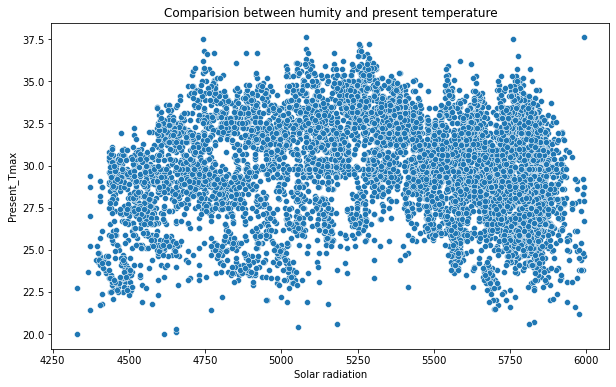

In [49]:

plt.figure(figsize=[10,6])
plt.title("Comparision between humity and present temperature")
sn.scatterplot(df['Solar radiation'],df['Present_Tmax'])

<AxesSubplot:>

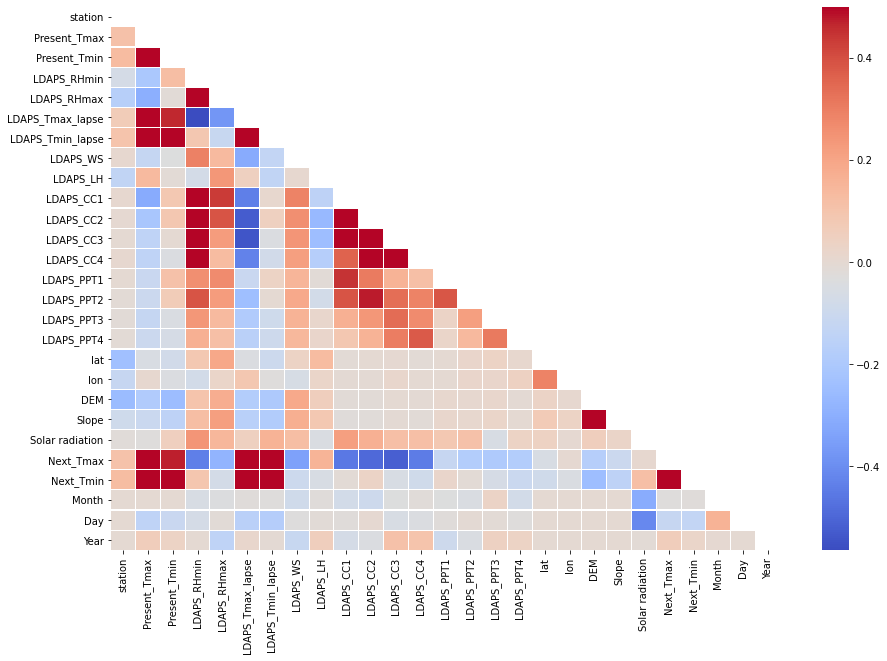

In [50]:
corr = df.corr()
hide = np.zeros_like(corr)
hide[np.triu_indices_from(hide)] = True
plt.figure(figsize=(15, 10))
sn.heatmap(corr,
            vmax=.5,
            mask=hide,
            linewidths=.2, cmap="coolwarm")

We can see that the Next_Tmax and Next_tmin are highly correlated positively to Present_Tmax,Present_Tmin,LDAPS_Tmax_lapse and 
LDAPS_Tmin_lapse and negatively correlated to LAPS_CCs

<AxesSubplot:title={'center':'Comparision between humity and present temperature'}, xlabel='LDAPS_CC1', ylabel='Next_Tmax'>

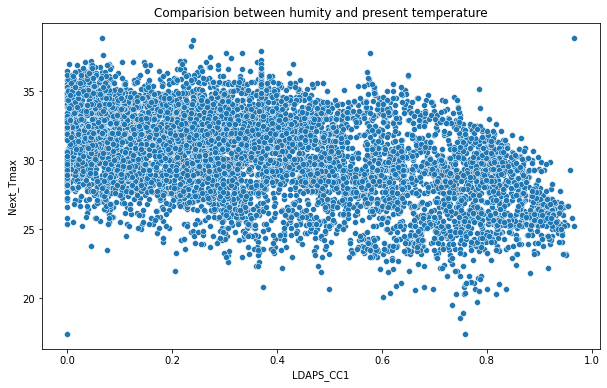

In [51]:
plt.figure(figsize=[10,6])
plt.title("Comparision between humity and present temperature")
sn.scatterplot(df['LDAPS_CC1'],df['Next_Tmax'])

<AxesSubplot:title={'center':'Comparision between humity and present temperature'}, xlabel='LDAPS_CC2', ylabel='Next_Tmax'>

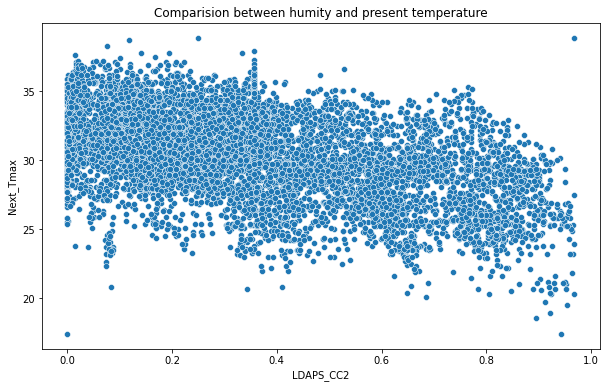

In [52]:
plt.figure(figsize=[10,6])
plt.title("Comparision between humity and present temperature")
sn.scatterplot(df['LDAPS_CC2'],df['Next_Tmax'])

Let us try to remove the outliers.

In [53]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_zscore=df[(z<3).all(axis=1)]
df_zscore.shape

(6894, 27)

In [54]:
df_zscore.skew()

station             0.002792
Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.688257
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            1.087781
LDAPS_LH            0.568781
LDAPS_CC1           0.593990
LDAPS_CC2           0.500911
LDAPS_CC3           0.700217
LDAPS_CC4           0.710930
LDAPS_PPT1          3.731226
LDAPS_PPT2          4.843672
LDAPS_PPT3          5.482625
LDAPS_PPT4          5.927822
lat                 0.108251
lon                -0.275508
DEM                 1.764031
Slope               1.593600
Solar radiation    -0.505353
Next_Tmax          -0.270084
Next_Tmin          -0.237767
Month              -0.683578
Day                 0.255263
Year                0.010998
dtype: float64

In [55]:
# So let us apply yeo johnson
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
dfpt=pt.fit_transform(df_zscore)
df_zscore=pd.DataFrame(dfpt,columns=df_zscore.columns)

In [56]:
df_zscore.skew()

station            -0.201793
Present_Tmax       -0.031861
Present_Tmin       -0.021731
LDAPS_RHmin        -0.013773
LDAPS_RHmax        -0.098610
LDAPS_Tmax_lapse   -0.011202
LDAPS_Tmin_lapse   -0.025139
LDAPS_WS            0.006111
LDAPS_LH           -0.029488
LDAPS_CC1           0.062650
LDAPS_CC2           0.047088
LDAPS_CC3           0.090316
LDAPS_CC4           0.137619
LDAPS_PPT1          1.546602
LDAPS_PPT2          1.736072
LDAPS_PPT3          1.903031
LDAPS_PPT4          2.157042
lat                 0.091387
lon                -0.189409
DEM                 0.038729
Slope               0.233805
Solar radiation    -0.166145
Next_Tmax          -0.035691
Next_Tmin          -0.021823
Month               0.040257
Day                -0.034433
Year                0.000000
dtype: float64

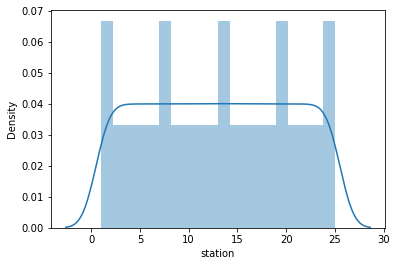

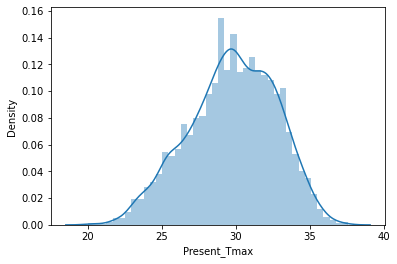

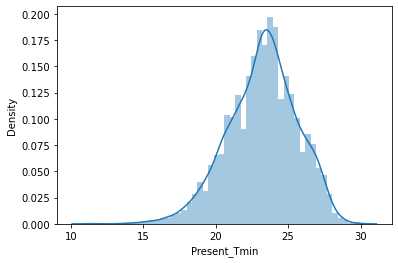

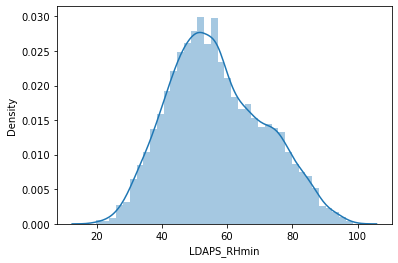

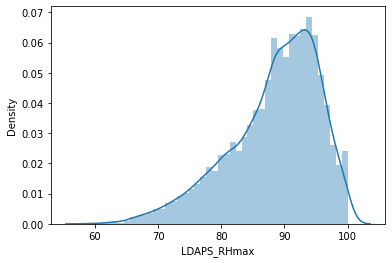

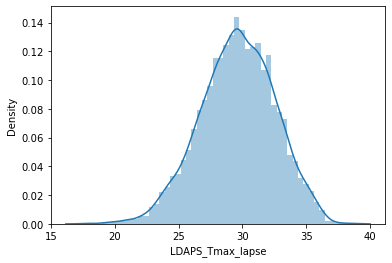

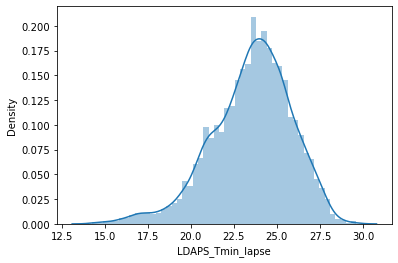

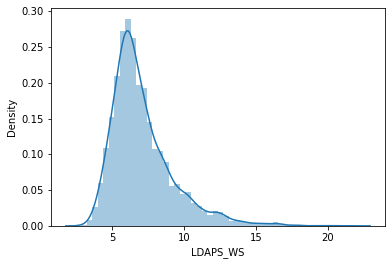

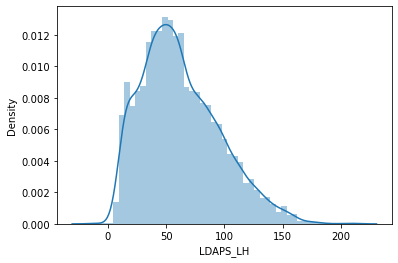

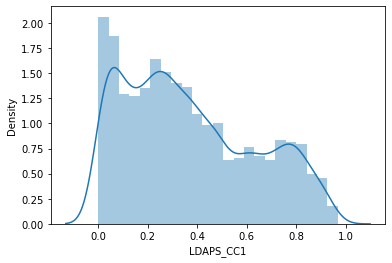

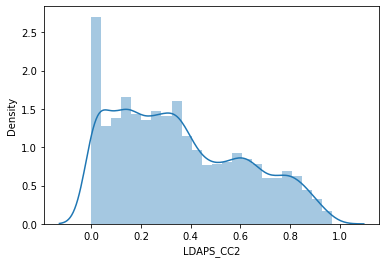

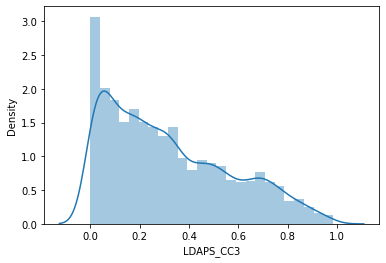

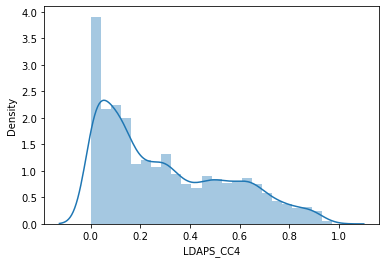

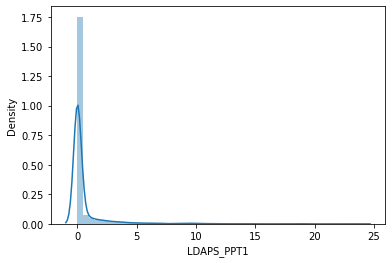

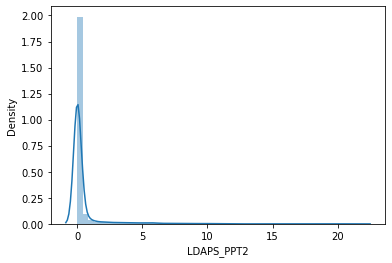

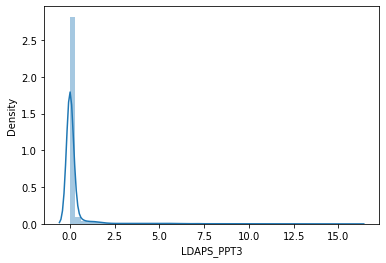

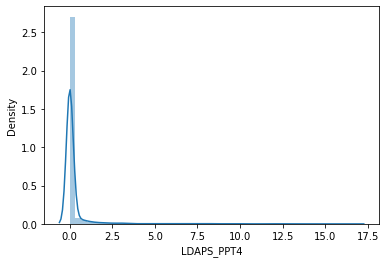

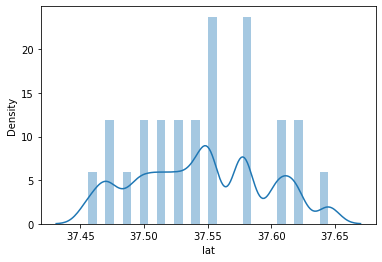

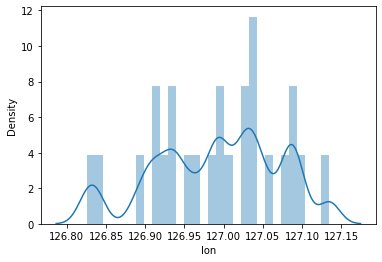

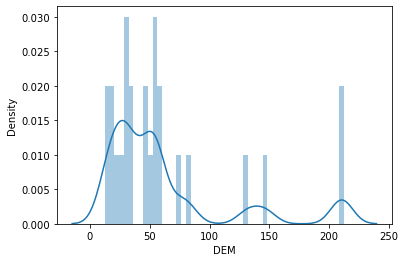

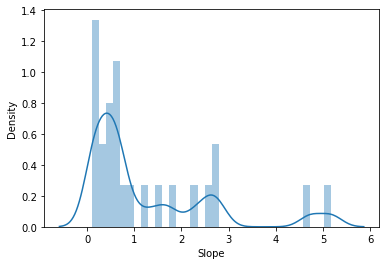

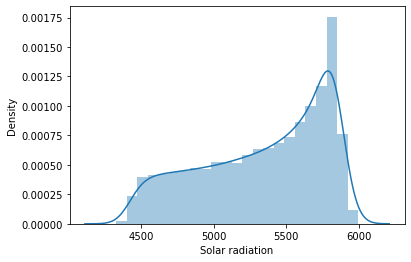

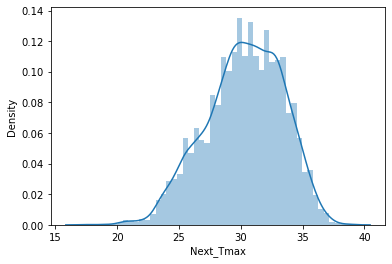

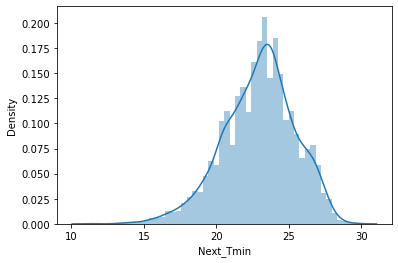

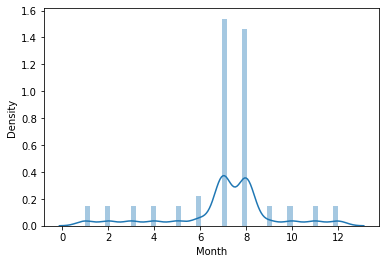

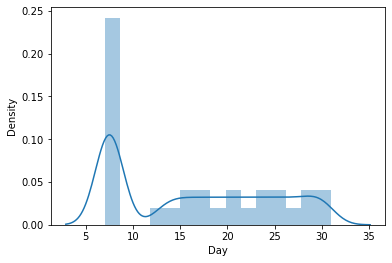

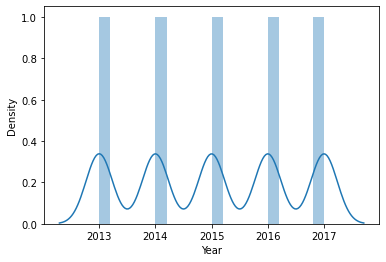

In [57]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    #plt.figure(figsize=(10,10))
    sn.distplot(df[col])

In [60]:
y_max = df_zscore['Next_Tmax']
y_min = df_zscore['Next_Tmin']
x = df_zscore
x.drop('Next_Tmax',axis = 1, inplace = True)
x.drop('Next_Tmin',axis = 1, inplace = True)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.87104901, -0.48019841, -0.84787568, ..., -0.58365193,
         1.41954403,  0.        ],
       [-1.65847105,  0.66852579, -0.76596533, ..., -0.58365193,
         1.41954403,  0.        ],
       [-1.46438257,  0.55534197, -0.04509429, ..., -0.58365193,
         1.41954403,  0.        ],
       ...,
       [ 1.31070626, -2.12825143, -2.4591396 , ...,  0.35760111,
         1.41954403,  0.        ],
       [ 1.42599707, -2.12825143, -2.25167386, ...,  0.35760111,
         1.41954403,  0.        ],
       [ 1.54006238, -2.15536702, -2.35611829, ...,  0.35760111,
         1.41954403,  0.        ]])

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y_max,test_size=0.25,random_state=42)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lr = LinearRegression()
lr.fit(X_train,y_train)
pred= lr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.7504538363230733
Mean absolute error =  0.38059020552768374
Mean Squared error =  0.2520122205468718
Root Mean Sqaured Error=  0.5020081877289172


In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
cv_score = cross_val_score(lr,x_scaled,y_max,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.6634213363365322

In [77]:
from sklearn.ensemble import RandomForestRegressor
  
rfr = RandomForestRegressor(n_estimators = 100, random_state = 12)
rfr.fit(X_train, y_train) 
pred= rfr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.8900240865922099
Mean absolute error =  0.249340162647582
Mean Squared error =  0.11106271375283118
Root Mean Sqaured Error=  0.3332607293889143


In [80]:
cv_score = cross_val_score(rfr,x_scaled,y_max,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.6634682245252731

In [81]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha= 0.1,random_state= 0)
lasso.fit(X_train, y_train) 
pred= lasso.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.6901456552278631
Mean absolute error =  0.43466867499581124
Mean Squared error =  0.3129163771606488
Root Mean Sqaured Error=  0.5593892894582885


In [82]:
cv_score = cross_val_score(lasso,x_scaled,y_max,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.6311914762250025

In [83]:
 from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train, y_train) 
pred= knr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.8392195613905472
Mean absolute error =  0.2994500176941344
Mean Squared error =  0.16236929775817094
Root Mean Sqaured Error=  0.40295073862467473


In [84]:
cv_score = cross_val_score(knr,x_scaled,y_max,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.4939846342150555

In [85]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha= 0.001,random_state= 0)
ridge.fit(X_train, y_train) 
pred= ridge.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.7504538254589539
Mean absolute error =  0.38059021627848916
Mean Squared error =  0.25201223151835217
Root Mean Sqaured Error=  0.5020081986565081


In [87]:
cv_score = cross_val_score(ridge,x_scaled,y_max,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.6634213724007252